In [1]:
import pandas as pd
import datetime as dt
from datetime import date
import matplotlib.pyplot as plt
import yfinance as yf
import numpy as np
import tensorflow as tf

In [2]:
START = "2010-01-01"
TODAY = date.today().strftime("%Y-%m-%d")

# Define a function to load the dataset

def load_data(ticker):
    data = yf.download(ticker, START, TODAY)
    data.reset_index(inplace=True)
    return data

In [3]:
data = load_data('TCS.NS')
df=data
df.head()

[*********************100%%**********************]  1 of 1 completed


,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,377.399994,379.450012,374.524994,375.825012,284.856293,1963682
1,2010-01-05,377.500000,379.774994,373.274994,375.924988,284.932129,2014488
2,2010-01-06,375.924988,376.100006,366.500000,367.424988,278.489563,3349176
3,2010-01-07,367.750000,369.700012,355.500000,357.200012,270.739441,6474892
4,2010-01-08,358.000000,359.250000,348.250000,349.899994,265.206573,6048178


In [4]:
df = df.drop(['Date', 'Adj Close'], axis = 1)
df.head()

,Open,High,Low,Close,Volume
0,377.399994,379.450012,374.524994,375.825012,1963682
1,377.500000,379.774994,373.274994,375.924988,2014488
2,375.924988,376.100006,366.500000,367.424988,3349176
3,367.750000,369.700012,355.500000,357.200012,6474892
4,358.000000,359.250000,348.250000,349.899994,6048178


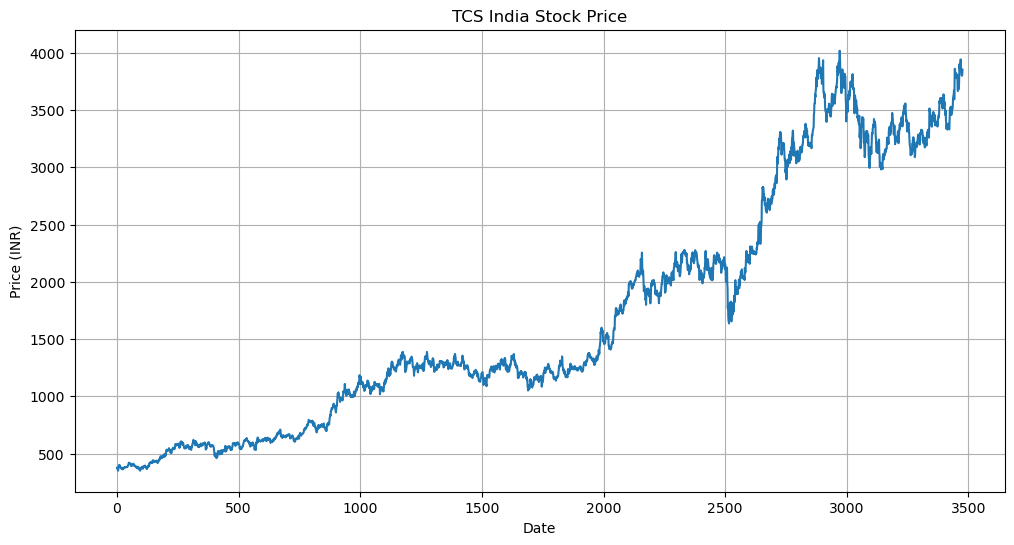

In [5]:
plt.figure(figsize=(12, 6))
plt.plot(df['Close'])
plt.title("TCS India Stock Price")
plt.xlabel("Date")
plt.ylabel("Price (INR)")
plt.grid(True)
plt.show()

In [6]:
df

,Open,High,Low,Close,Volume
0,377.399994,379.450012,374.524994,375.825012,1963682
1,377.500000,379.774994,373.274994,375.924988,2014488
2,375.924988,376.100006,366.500000,367.424988,3349176
3,367.750000,369.700012,355.500000,357.200012,6474892
4,358.000000,359.250000,348.250000,349.899994,6048178
...,...,...,...,...,...
3472,3839.899902,3861.000000,3778.699951,3810.300049,2205154
3473,3800.800049,3820.000000,3780.850098,3801.000000,1646747
3474,3807.449951,3847.800049,3787.000000,3800.550049,1411621
3475,3811.199951,3834.000000,3796.449951,3815.949951,2459358


In [7]:
ma100 = df.Close.rolling(100).mean()
ma100

0               NaN
1               NaN
2               NaN
3               NaN
4               NaN
           ...     
3472    3589.059504
3473    3593.501504
3474    3597.715005
3475    3601.689504
3476    3605.937502
Name: Close, Length: 3477, dtype: float64

Text(0.5, 1.0, 'Graph Of Moving Averages Of 100 Days')

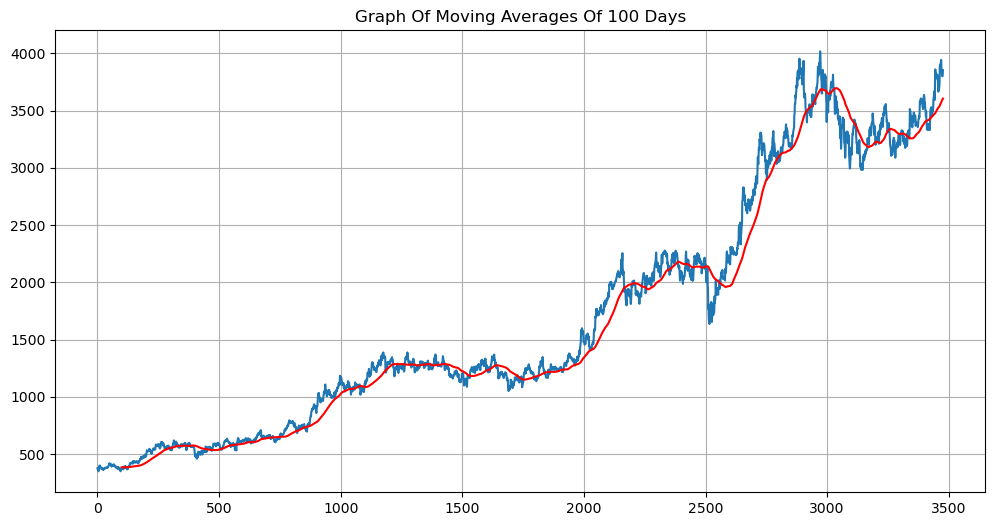

In [8]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')
plt.grid(True)
plt.title('Graph Of Moving Averages Of 100 Days')

In [9]:
ma200= df.Close.rolling(200).mean()
ma200

0               NaN
1               NaN
2               NaN
3               NaN
4               NaN
           ...     
3472    3445.929750
3473    3448.831250
3474    3451.517001
3475    3454.527750
3476    3457.590250
Name: Close, Length: 3477, dtype: float64

Text(0.5, 1.0, 'Comparision Of 100 Days And 200 Days Moving Averages')

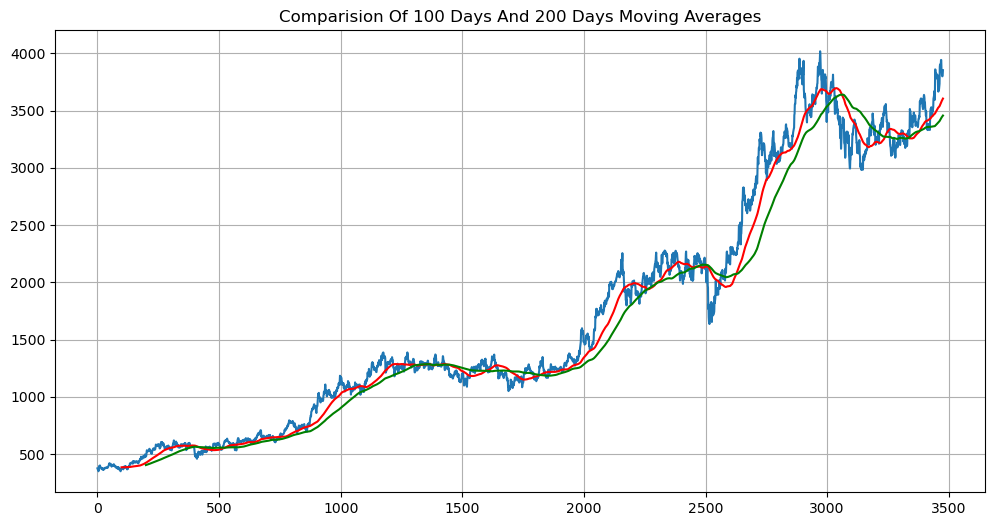

In [10]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')
plt.plot(ma200, 'g')
plt.grid(True)
plt.title('Comparision Of 100 Days And 200 Days Moving Averages')

In [11]:
df.shape

(3477, 5)

In [12]:
# Splitting data into training and testing

train = pd.DataFrame(data[0:int(len(data)*0.70)])
test = pd.DataFrame(data[int(len(data)*0.70): int(len(data))])

print(train.shape)
print(test.shape)

(2433, 7)
(1044, 7)


In [13]:
train.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,377.399994,379.450012,374.524994,375.825012,284.856293,1963682
1,2010-01-05,377.500000,379.774994,373.274994,375.924988,284.932129,2014488
2,2010-01-06,375.924988,376.100006,366.500000,367.424988,278.489563,3349176
3,2010-01-07,367.750000,369.700012,355.500000,357.200012,270.739441,6474892
4,2010-01-08,358.000000,359.250000,348.250000,349.899994,265.206573,6048178


In [14]:
test.head()

,Date,Open,High,Low,Close,Adj Close,Volume
2433,2019-11-20,2121.949951,2135.000000,2094.500000,2108.550049,1944.853271,2894129
2434,2019-11-21,2112.000000,2126.600098,2107.399902,2118.100098,1953.661987,2052574
2435,2019-11-22,2097.000000,2107.000000,2060.500000,2071.699951,1910.864014,3742049
2436,2019-11-25,2074.550049,2084.949951,2052.199951,2081.500000,1919.902832,2737010
2437,2019-11-26,2089.850098,2097.899902,2035.050049,2046.650024,1887.758545,6561580


In [15]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [16]:
train_close = train.iloc[:, 4:5].values
test_close = test.iloc[:, 4:5].values

In [17]:
data_training_array = scaler.fit_transform(train_close)
data_training_array

array([[0.01351019],
       [0.01356204],
       [0.00915373],
       ...,
       [0.9463223 ],
       [0.93499042],
       [0.91227461]])

In [18]:
x_train = []
y_train = [] 

for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100: i])
    y_train.append(data_training_array[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train) 

In [19]:
x_train.shape

(2333, 100, 1)

In [20]:
from tensorflow.keras.layers import Dense, Dropout, LSTM
from tensorflow.keras.models import Sequential

In [21]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences=True
              ,input_shape = (x_train.shape[1], 1)))
model.add(Dropout(0.2))


model.add(LSTM(units = 60, activation = 'relu', return_sequences=True))
model.add(Dropout(0.3))


model.add(LSTM(units = 80, activation = 'relu', return_sequences=True))
model.add(Dropout(0.4))


model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units = 1))

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

In [23]:
import tensorflow as tf
model.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics=[tf.keras.metrics.MeanAbsoluteError()])
model.fit(x_train, y_train,epochs = 100)

Epoch 1/100
73/73 [==============================] - 28s 269ms/step - loss: 0.0332 - mean_absolute_error: 0.1230
Epoch 2/100
73/73 [==============================] - 20s 268ms/step - loss: 0.0072 - mean_absolute_error: 0.0593
Epoch 3/100
73/73 [==============================] - 19s 254ms/step - loss: 0.0079 - mean_absolute_error: 0.0615
Epoch 4/100
73/73 [==============================] - 18s 247ms/step - loss: 0.0059 - mean_absolute_error: 0.0530
Epoch 5/100
73/73 [==============================] - 18s 247ms/step - loss: 0.0054 - mean_absolute_error: 0.0507
Epoch 6/100
73/73 [==============================] - 18s 246ms/step - loss: 0.0053 - mean_absolute_error: 0.0501
Epoch 7/100
73/73 [==============================] - 18s 250ms/step - loss: 0.0052 - mean_absolute_error: 0.0501
Epoch 8/100
73/73 [==============================] - 18s 250ms/step - loss: 0.0047 - mean_absolute_error: 0.0479
Epoch 9/100
73/73 [==============================] - 18s 247ms/step - loss: 0.0043 - mean_absolu

Epoch 73/100
73/73 [==============================] - 11s 150ms/step - loss: 0.0021 - mean_absolute_error: 0.0336
Epoch 74/100
73/73 [==============================] - 11s 152ms/step - loss: 0.0019 - mean_absolute_error: 0.0320
Epoch 75/100
73/73 [==============================] - 11s 156ms/step - loss: 0.0020 - mean_absolute_error: 0.0324
Epoch 76/100
73/73 [==============================] - 11s 154ms/step - loss: 0.0020 - mean_absolute_error: 0.0323
Epoch 77/100
73/73 [==============================] - 11s 155ms/step - loss: 0.0022 - mean_absolute_error: 0.0332
Epoch 78/100
73/73 [==============================] - 11s 154ms/step - loss: 0.0019 - mean_absolute_error: 0.0320
Epoch 79/100
73/73 [==============================] - 10s 141ms/step - loss: 0.0019 - mean_absolute_error: 0.0327
Epoch 80/100
73/73 [==============================] - 11s 144ms/step - loss: 0.0020 - mean_absolute_error: 0.0323
Epoch 81/100
73/73 [==============================] - 11s 154ms/step - loss: 0.0020 - me

In [24]:
model.save('keras_model.h5')

C:\Users\HP\anaconda3\Lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [25]:
test_close.shape

(1044, 1)

In [26]:
past_100_days = pd.DataFrame(train_close[-100:])

In [27]:
test_df = pd.DataFrame(test_close)

In [28]:
final_df = past_100_days.append(test_df, ignore_index = True)

C:\Users\HP\AppData\Local\Temp\ipykernel_10496\1505569079.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df = past_100_days.append(test_df, ignore_index = True)


In [29]:
final_df.head()

,0
0,2249.850098
1,2275.500000
2,2267.800049
3,2254.199951
4,2252.550049


In [30]:
input_data = scaler.fit_transform(final_df)
input_data

array([[0.25747026],
       [0.26823487],
       [0.2650034 ],
       ...,
       [0.90825925],
       [0.91472219],
       [0.93075373]])

In [31]:
input_data.shape

(1144, 1)

In [46]:
x_test = []
y_test = []
for i in range(100, input_data.shape[0]):
   x_test.append(input_data[i-100: i])
   y_test.append(input_data[i, 0])

In [33]:
x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(1044, 100, 1)
(1044,)


In [34]:
# Making predictions

y_pred = model.predict(x_test)

33/33 [==============================] - 3s 42ms/step


In [35]:
y_pred.shape

(1044, 1)

In [36]:
y_test

array([0.19817026, 0.20217817, 0.18270522, ..., 0.90825925, 0.91472219,
       0.93075373])

In [37]:
y_pred

array([[0.2621471 ],
       [0.26110172],
       [0.25952893],
       ...,
       [0.8281303 ],
       [0.81591356],
       [0.80630136]], dtype=float32)

In [38]:
scaler.scale_

array([0.00041967])

In [39]:
scale_factor = 1/0.00041967
y_pred = y_pred * scale_factor
y_test = y_test * scale_factor

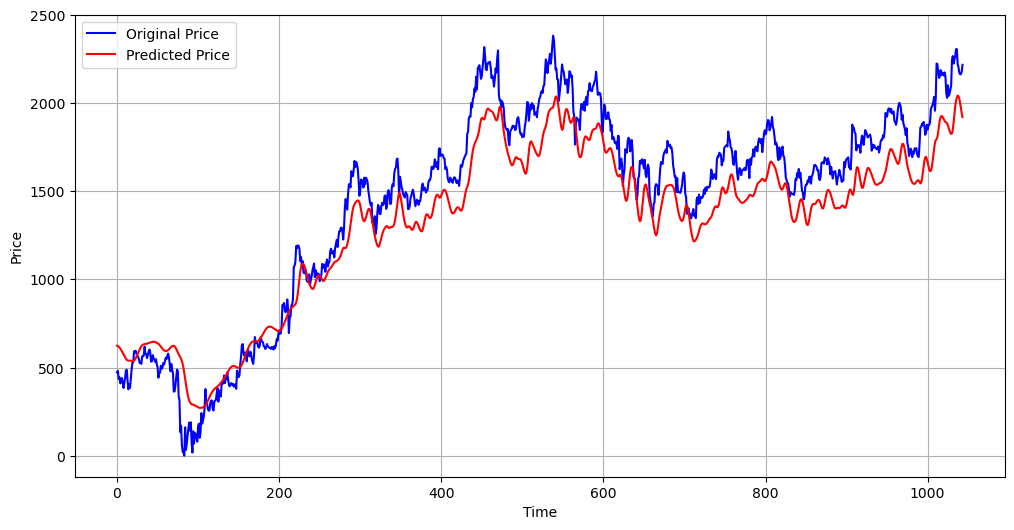

In [40]:
plt.figure(figsize = (12,6))
plt.plot(y_test, 'b', label = "Original Price")
plt.plot(y_pred, 'r', label = "Predicted Price")
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

In [41]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, y_pred)
mae_percentage = (mae / np.mean(y_test)) * 100
print("Mean absolute error on test set: {:.2f}%".format(mae_percentage))

Mean absolute error on test set: 11.68%


In [42]:
from sklearn.metrics import r2_score

# Actual values
actual = y_test

# Predicted values
predicted = y_pred

# Calculate the R2 score
r2 = r2_score(actual, predicted)

print("R2 score:", r2)

R2 score: 0.8864310265549643


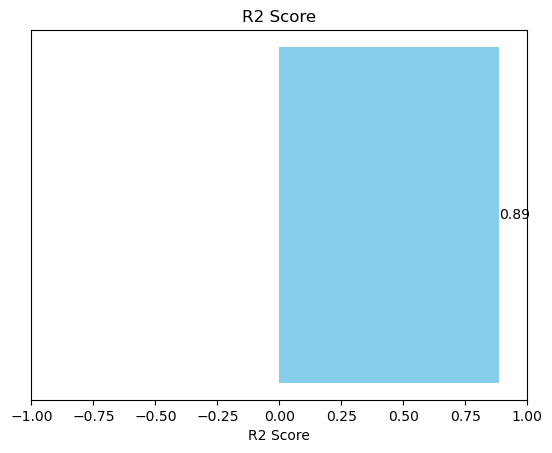

In [43]:
# Plotting the R2 score
fig, ax = plt.subplots()
ax.barh(0, r2, color='skyblue')
ax.set_xlim([-1, 1])
ax.set_yticks([])
ax.set_xlabel('R2 Score')
ax.set_title('R2 Score')

# Adding the R2 score value on the bar
ax.text(r2, 0, f'{r2:.2f}', va='center', color='black')

plt.show()

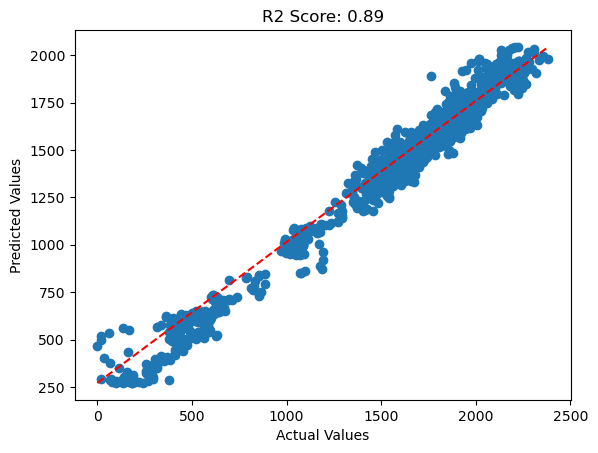

In [44]:
plt.scatter(actual, predicted)
plt.plot([min(actual), max(actual)], [min(predicted), max(predicted)], 'r--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title(f'R2 Score: {r2:.2f}')
plt.show()